In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt

In [2]:
#Read the data set
data=pd.read_csv("forestfires1.csv")
data.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small


# EDA

In [3]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
data.shape

(517, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.tail(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,small


In [8]:
data.sample()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
196,apr,thu,81.5,9.1,55.2,2.7,5.8,54,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large


In [9]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='size_category', ylabel='count'>

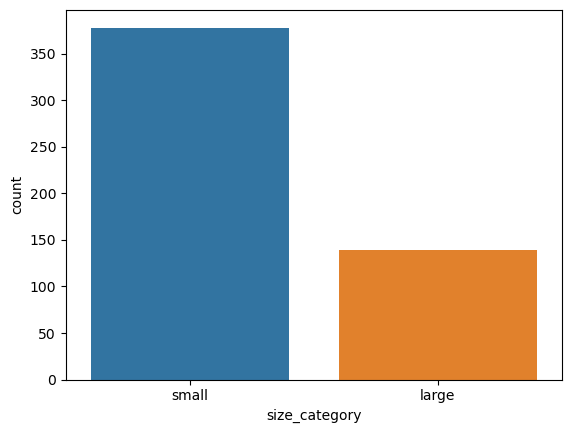

In [10]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.countplot(data["size_category"])

# Preprocessing

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
label_encoder=preprocessing.LabelEncoder()
data['month']=label_encoder.fit_transform(data['month'])
data['month'].unique()

array([ 7, 10,  1, 11,  0,  6,  5,  3,  4,  2,  8,  9])

In [12]:
data['day']=label_encoder.fit_transform(data['day'])
data['day'].unique()

array([0, 5, 2, 3, 1, 6, 4])

In [13]:
train, test = train_test_split(data, test_size = 0.3, random_state = 0)

In [14]:
train[:3]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
390,3,1,84.7,9.5,58.3,4.1,7.5,71,6.3,0.0,...,1,0,0,0,0,0,0,0,0,large
5,1,3,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
141,1,6,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,...,0,0,0,0,0,0,0,0,0,small


In [15]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [16]:
model_linear = SVC(kernel = "linear")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.967948717948718

In [17]:
model_linear = SVC(kernel = "poly")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.7564102564102564

In [18]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(train_X, train_y)
pred_test_linear = model_linear.predict(test_X)

np.mean(pred_test_linear == test_y)

0.7243589743589743

In [19]:
train_X.shape, train_y.shape,
test_X.shape, test_y.shape

((156, 30), (156,))

In [20]:
import warnings
warnings.filterwarnings("ignore")

# Grid search cv

In [21]:
clf = SVC()
param_grid = [{'kernel' : ['rbf'],'gamma':[50,5,10,0,5,0,1],'C':[25,22,20,18,16,15,14,13,12,11,10,0,1,0.001]}]
gsv = GridSearchCV(clf, param_grid,cv=10)
gsv.fit(train_X,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 22, 20, 18, 16, 15, 14, 13, 12, 11, 10, 0,
                                1, 0.001],
                          'gamma': [50, 5, 10, 0, 5, 0, 1],
                          'kernel': ['rbf']}])

In [22]:
gsv.best_params_,gsv.best_score_

({'C': 25, 'gamma': 1, 'kernel': 'rbf'}, 0.7479729729729729)

In [23]:
clf = SVC(C=22, gamma = 0.1)
clf.fit(train_X,train_y)
pred_y = clf.predict(test_X)

In [24]:
accuracy = accuracy_score(test_y, pred_y)*100
print("Accuracy=",accuracy)

Accuracy= 71.15384615384616


In [25]:
confusion_matrix(test_y, pred_y)

array([[  1,  45],
       [  0, 110]], dtype=int64)

In [26]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

       large       1.00      0.02      0.04        46
       small       0.71      1.00      0.83       110

    accuracy                           0.71       156
   macro avg       0.85      0.51      0.44       156
weighted avg       0.80      0.71      0.60       156



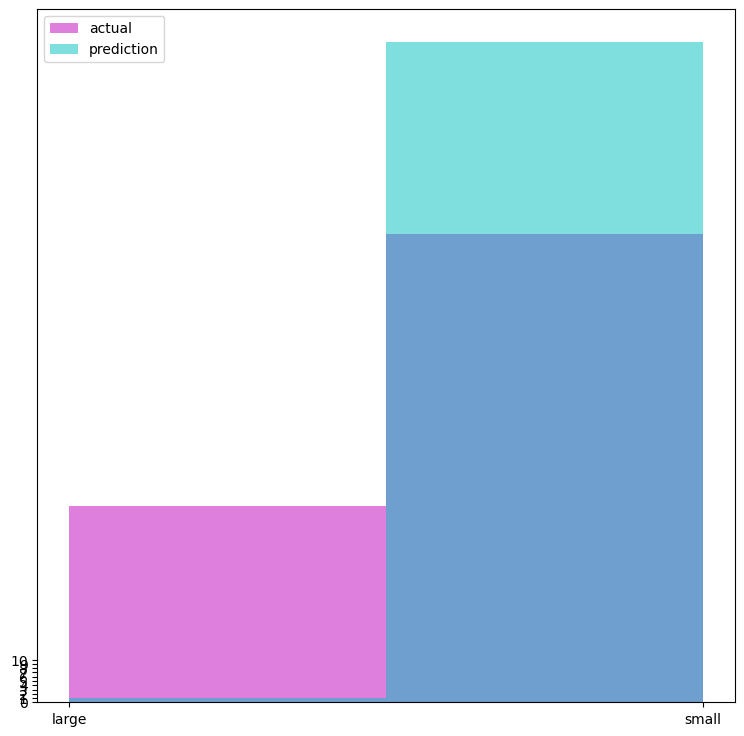

In [27]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(test_y, color = 'm',alpha = 0.5, label = 'actual', bins = 2)
ax.hist(pred_y, color = 'c',alpha = 0.5, label = 'prediction', bins = 2)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()